In [2]:
!pip install gower

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
# Adjusted function to read and parse the .data file, ensuring -1 class is correctly handled
def load_data(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    data = []
    current_class = None

    # Columns from the first line (removing the last two characters \n and space at the end)
    columns = lines[0].strip().split()
    columns.append('Class')  # Adding the 'Class' column for labels

    # Parse each line
    for line in lines[1:]:  # Start from the second line to skip header
        stripped_line = line.strip()
        if stripped_line.lstrip('-').isdigit():  # This is a class label, handles negative numbers
            current_class = int(stripped_line)
        else:
            # This is a data line, split by spaces and convert to float
            data_values = list(map(float, stripped_line.split()))
            data_values.append(current_class)  # Append the current class
            data.append(data_values)

    # Create DataFrame
    df = pd.DataFrame(data, columns=columns)
    return df

# Load and label the data including -1 correctly
df = load_data('rocket_league_skillshots.data')



In [33]:
# export data frame to .csv file

df.to_csv('rocket_league_with_classes.csv', sep = ',')

In [25]:
df['Class'].nunique()

7

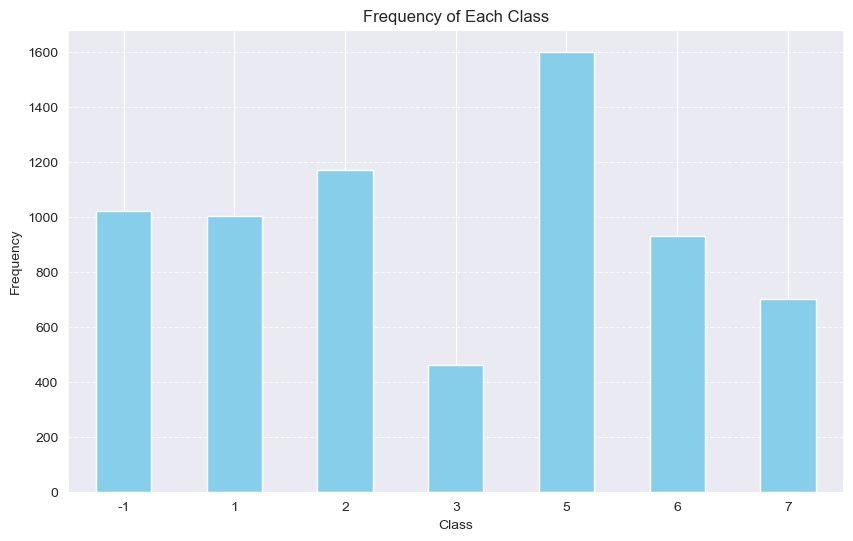

In [27]:
# Plotting the histogram of the frequency of each class including -1
plt.figure(figsize=(10, 6))
df['Class'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Frequency of Each Class')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Keep the class labels horizontal for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [34]:
df_no_target = df.drop(columns=['Class'])